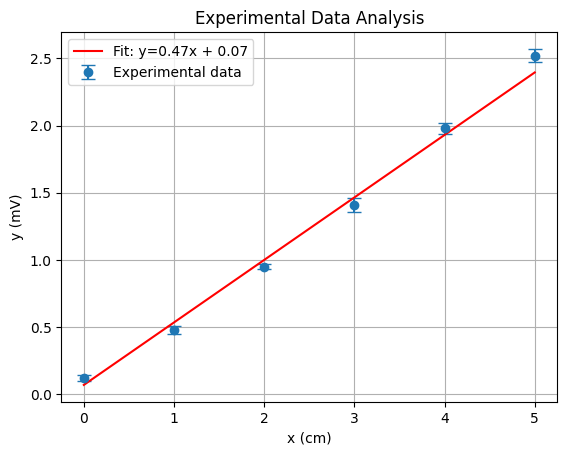

a = 0.465 ± 0.008
b = 0.070 ± 0.017
95% CI for a: (np.float64(0.4432358752483547), np.float64(0.4868636000009485))
95% CI for b: (np.float64(0.022859210193362088), np.float64(0.11649096917294291))


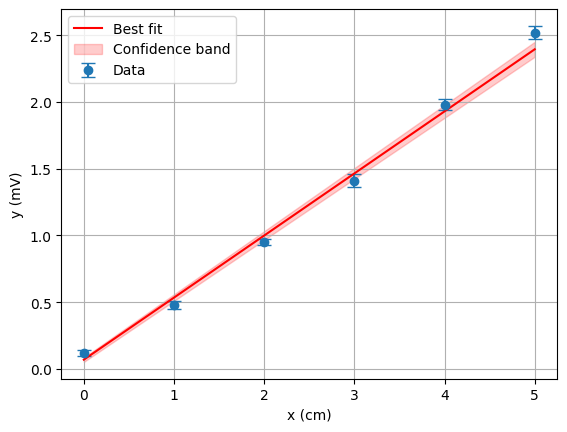

a = 0.356 ± 0.011
b = 0.411 ± 0.008


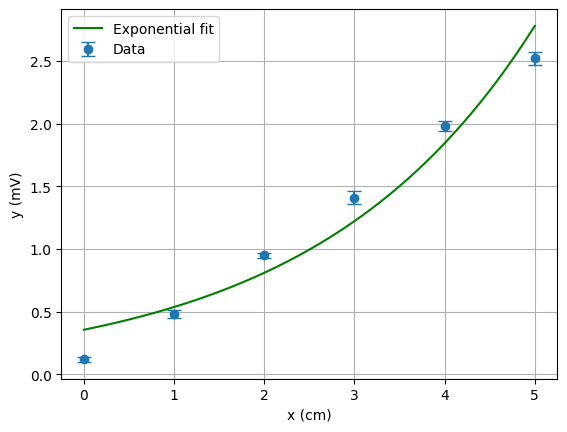

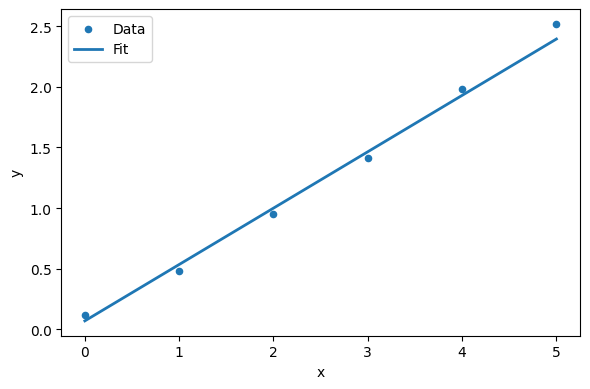

Linear fit χ² = 24.88
Linear fit reduced χ² = 6.22
Exponential fit χ² = 244.78
Exponential fit reduced χ² = 61.19
Linear fit p-value = 0.0001
Exponential fit p-value = 0.0000


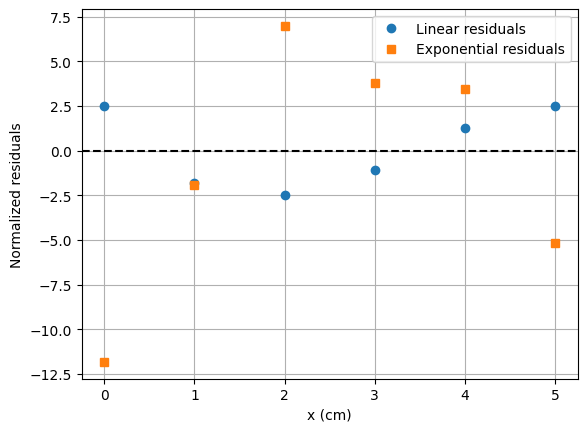

D = 0.249 ± 0.002


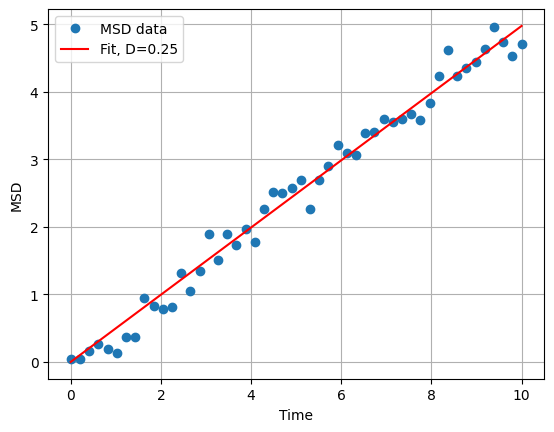

MC integral = 0.33454801267213713
MSD = 4383.2376


In [1]:
#3
import pandas as pd

data = pd.read_csv("../data/data.csv")

data
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = data['x_cm']
y = data['y_mV']
y_err = data['y_error_mV']

def linear_model(x, a, b):
    return a*x + b

params, cov = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
a, b = params

x_fit = np.linspace(min(x), max(x), 200)
y_fit = linear_model(x_fit, a, b)

plt.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, label='Experimental data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y={a:.2f}x + {b:.2f}')
plt.xlabel("x (cm)")
plt.ylabel("y (mV)")
plt.title("Experimental Data Analysis")
plt.legend()
plt.grid(True)
plt.savefig("../figures/experimental_fit.png", dpi=300)
plt.show()
#4
import numpy as np

perr = np.sqrt(np.diag(cov))
a_err, b_err = perr

print(f"a = {a:.3f} ± {a_err:.3f}")
print(f"b = {b:.3f} ± {b_err:.3f}")
from scipy.stats import t

n = len(x)              # number of data points
p = len(params)         # number of parameters
dof = max(0, n - p)     # degrees of freedom

tval = t.ppf(0.975, dof)  # 95% CI

ci_a = (a - tval*a_err, a + tval*a_err)
ci_b = (b - tval*b_err, b + tval*b_err)

print("95% CI for a:", ci_a)
print("95% CI for b:", ci_b)
y_fit = linear_model(x_fit, a, b)

y_upper = linear_model(x_fit, a + a_err, b + b_err)
y_lower = linear_model(x_fit, a - a_err, b - b_err)

plt.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Best fit')
plt.fill_between(x_fit, y_lower, y_upper, color='red', alpha=0.2, label='Confidence band')

plt.xlabel("x (cm)")
plt.ylabel("y (mV)")
plt.legend()
plt.grid(True)
plt.show()
#5
def exp_model(x, a, b):
    return a * np.exp(b * x)
params_exp, cov_exp = curve_fit(
    exp_model, x, y,
    sigma=y_err,
    absolute_sigma=True
)

a_exp, b_exp = params_exp
a_exp_err, b_exp_err = np.sqrt(np.diag(cov_exp))

print(f"a = {a_exp:.3f} ± {a_exp_err:.3f}")
print(f"b = {b_exp:.3f} ± {b_exp_err:.3f}")
x_fit = np.linspace(min(x), max(x), 200)
y_exp_fit = exp_model(x_fit, a_exp, b_exp)

plt.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, label='Data')
plt.plot(x_fit, y_exp_fit, 'g-', label='Exponential fit')

plt.xlabel("x (cm)")

plt.ylabel("y (mV)")
plt.legend()
plt.grid(True)
plt.show()
#6
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Ensure output directories exist
# -----------------------------
os.makedirs("../data", exist_ok=True)
os.makedirs("../figures", exist_ok=True)

# -----------------------------
# Save fit parameters
# (assumes a, b, a_err, b_err already exist)
# -----------------------------
results = pd.DataFrame({
    "Parameter": ["a", "b"],
    "Value": [a, b],
    "Uncertainty": [a_err, b_err]
})

results.to_csv("../data/fit_results.csv", index=False)

# -----------------------------
# Save fitted curve
# (assumes x_fit and y_fit already exist)
# -----------------------------
fit_data = pd.DataFrame({
    "x": x_fit,
    "y_fit": y_fit
})

fit_data.to_csv("../data/fitted_curve.csv", index=False)

# -----------------------------
# Plot and save figure
# (assumes original data x, y exist)
# -----------------------------
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label="Data", s=20)
plt.plot(x_fit, y_fit, label="Fit", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()

plt.savefig("../figures/final_fit.png", dpi=300)
plt.show()

#7
def chi_square(y_obs, y_exp, y_err):
    return np.sum(((y_obs - y_exp) / y_err)**2)
y_linear_fit = linear_model(x, a, b)

chi2_linear = chi_square(y, y_linear_fit, y_err)

dof_linear = len(x) - 2   # 2 parameters: a, b
chi2_red_linear = chi2_linear / dof_linear

print(f"Linear fit χ² = {chi2_linear:.2f}")
print(f"Linear fit reduced χ² = {chi2_red_linear:.2f}")
y_exp_fit_at_data = exp_model(x, a_exp, b_exp)

chi2_exp = chi_square(y, y_exp_fit_at_data, y_err)

dof_exp = len(x) - 2
chi2_red_exp = chi2_exp / dof_exp

print(f"Exponential fit χ² = {chi2_exp:.2f}")
print(f"Exponential fit reduced χ² = {chi2_red_exp:.2f}")

#8
from scipy.stats import chi2

p_linear = 1 - chi2.cdf(chi2_linear, dof_linear)
p_exp = 1 - chi2.cdf(chi2_exp, dof_exp)

print(f"Linear fit p-value = {p_linear:.4f}")
print(f"Exponential fit p-value = {p_exp:.4f}")
#9
residuals_linear = (y - y_linear_fit) / y_err
residuals_exp = (y - y_exp_fit_at_data) / y_err
plt.axhline(0, color='k', linestyle='--')

plt.plot(x, residuals_linear, 'o', label='Linear residuals')
plt.plot(x, residuals_exp, 's', label='Exponential residuals')

plt.xlabel("x (cm)")
plt.ylabel("Normalized residuals")
plt.legend()
plt.grid(True)
plt.show()
#10
stats = pd.DataFrame({
    "Model": ["Linear", "Exponential"],
    "Chi2": [chi2_linear, chi2_exp],
    "Reduced_Chi2": [chi2_red_linear, chi2_red_exp],
    "p_value": [p_linear, p_exp]
})

stats.to_csv("../data/model_comparison.csv", index=False)
stats
#11
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 50)        # time
D_true = 0.25                     # diffusion coefficient
msd = 2 * D_true * t + np.random.normal(0, 0.2, size=len(t))
from scipy.optimize import curve_fit

def msd_model(t, D):
    return 2 * D * t

params, cov = curve_fit(msd_model, t, msd)
D_fit = params[0]
D_err = np.sqrt(cov[0,0])

print(f"D = {D_fit:.3f} ± {D_err:.3f}")
#
t_fit = np.linspace(0, 10, 200)
msd_fit = msd_model(t_fit, D_fit)

plt.plot(t, msd, 'o', label="MSD data")
plt.plot(t_fit, msd_fit, 'r-', label=f"Fit, D={D_fit:.2f}")
plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.grid(True)

plt.show()
#12
N = 100000


x = np.random.rand(N)
integral = np.mean(x**2)

print("MC integral =", integral)
N = 10000
steps = np.random.choice([-1, 1], size=N)
x = np.cumsum(steps)

msd = np.mean(x**2)
print("MSD =", msd)
#13
dt = 0.01
steps = 1000
x, v = 0.0, 1.0

positions = []

for _ in range(steps):
    x += v * dt
    positions.append(x)
####14